In [147]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

#to ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [192]:
beers = pd.read_csv("beers.csv")
breweries = pd.read_csv("breweries.csv")
beers.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


In [193]:
style_null = beers[beers['style'].isnull()]
style_null

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
566,566,NaN,NaN,2210,Special Release,NaN,29,16.0
853,853,0.060,21.0,1635,Kilt Lifter Scottish-Style Ale,NaN,160,12.0
866,866,0.053,27.0,2527,OktoberFiesta,NaN,66,12.0
1554,1554,NaN,NaN,1796,The CROWLER™,NaN,166,32.0
1555,1555,NaN,NaN,1790,CAN'D AID Foundation,NaN,166,12.0


In [194]:
#Drop rows where abv and style are NaN
beers = beers.dropna(subset=['abv', 'style'])

In [195]:
beers.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


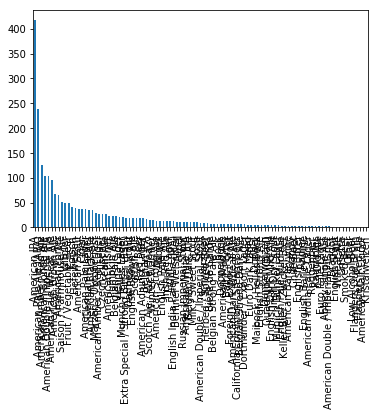

In [196]:
beers['style'].value_counts().plot(kind='bar')

Keep styles with greater than 5 counts in database

In [197]:
vc_style = beers['style'].value_counts()
vc_style_lt6 = vc_style[vc_style < 6]
styles_to_drop = list(vc_style_lt6.keys())

In [198]:
beers = beers[~beers['style'].isin(styles_to_drop)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]),
 <a list of 63 Text xticklabel objects>)

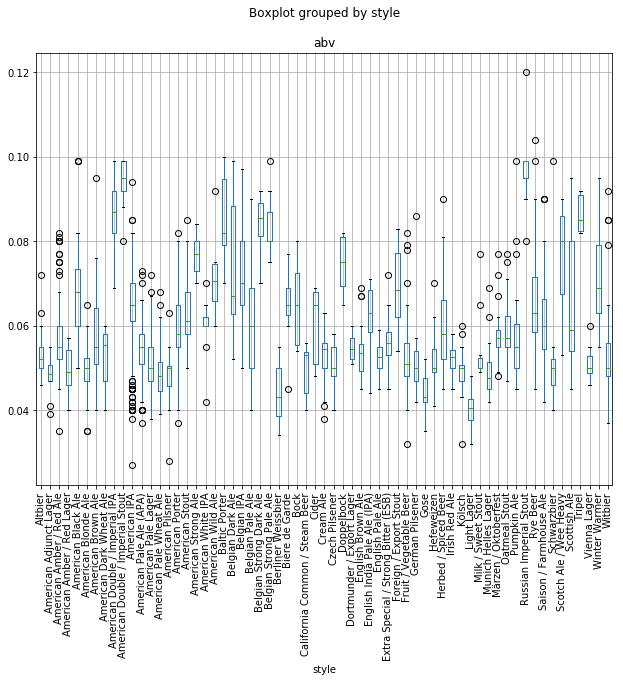

In [228]:
fig, ax = plt.subplots(figsize=(10,8))
beers.boxplot(column=['abv'], by='style', ax=ax)
plt.xticks(rotation=90)

Do LabelEncoding and OneHotEncoding for styles

In [171]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(beers['style'])
beers['style'] = le.transform(beers['style']) 

In [172]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
style_csr = ohe.fit_transform(beers['style'].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


**Model**  
First test linear regression with train_test_split  
Then do kfold corss validation

In [235]:
#Create training and test data
X = style_csr
y = beers.abv
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, random_state=0)

#Fit model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Predict abv and calculate error
y_pred = linreg.predict(X_test)
result = sklearn.metrics.r2_score(y_test,y_pred)
print(result)

0.5741760468814658


In [234]:
kfold = model_selection.KFold(n_splits=10, random_state=0)
results = model_selection.cross_val_score(linreg, X, y, cv=kfold)
print("R^2: %.3f%% (%.3f%%)" % (results.mean(), results.std()))

R^2: 0.555% (0.062%)
